In [16]:
from Bio import Phylo
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

from itertools import combinations

## Análisis de un Árbol Filogenético Existente

In [26]:
def analyze_tree(newick_file):
    tree = Phylo.read(newick_file, "newick")
    
    num_terminals = len(tree.get_terminals())
    num_clades = len(list(tree.find_clades()))
    branch_lengths = [clade.branch_length for clade in tree.find_clades() if clade.branch_length is not None]  # Longitudes de las ramas
    terminal_names = [terminal.name for terminal in tree.get_terminals()]
    
    clades_with_bootstrap = [(clade.confidence, clade) for clade in tree.find_clades() if clade.confidence is not None]
    best_bootstrap, best_clade = (None, None)
    if clades_with_bootstrap:
        best_bootstrap, best_clade = max(clades_with_bootstrap, key=lambda x: x[0])
    
    min_distance, closest_pair = float('inf'), None
    for (name1, name2) in combinations(terminal_names, 2):
        distance = tree.distance(name1, name2)
        if distance < min_distance:
            min_distance = distance
            closest_pair = (name1, name2)
    
    max_distance, most_distant_species = float('-inf'), None
    for name in terminal_names:
        total_distance = sum(tree.distance(name, other) for other in terminal_names if other != name)
        if total_distance > max_distance:
            max_distance = total_distance
            most_distant_species = name
    
    print(f"Información del árbol filogenético:")
    print(f"Número de terminales: {num_terminals}")
    print(f"Número de nodos/clados totales: {num_clades}")
    print(f"Longitudes de las ramas: {branch_lengths}")
    print(f"Nombres de terminales: {terminal_names}")

    if best_clade:
        print(f"Clado con el mejor bootstrap: {best_bootstrap}")

    if closest_pair:
        print(f"Especies más parecidas: {closest_pair} con distancia {min_distance}")
        
    if most_distant_species:
        print(f"Especie más distante al resto: {most_distant_species} con distancia total {max_distance}")
    
    return tree, closest_pair, most_distant_species

In [27]:
newick_file = "/Users/ricardo/Documents/ulpgc/ciencia_e_ingenieria_de_datos/cuarto/bio/pr4/data/hbb_tree.txt"
tree, closest_pair, most_distant_species = analyze_tree(newick_file)

Información del árbol filogenético:
Número de terminales: 22
Número de nodos/clados totales: 42
Longitudes de las ramas: [0.205701, 1.13866, 0.031261, 0.136879, 0.133087, 0.230584, 0.190835, 0.0953875, 0.162102, 0.28055, 0.0278707, 0.0186001, 0.0572805, 0.241457, 0.0286879, 0.0473548, 0.0106191, 0.00200754, 0.0021201, 0.00865119, 0.00195866, 0.0066246, 0.00852267, 5e-09, 0.0, 0.0, 0.0230908, 0.0215049, 0.00236303, 0.0103989, 0.012181, 0.0269614, 0.00456229, 0.00824827, 0.0273313, 0.00829855, 0.00242122, 0.023679, 0.00222634, 0.00210352, 0.00853381]
Nombres de terminales: ['AB364477.1', 'MZ593243.1', 'BT074827.1', 'BT082972.1', 'MT164172.1', 'NM_001160555.2', 'BT059665.1', 'OL804561.1', 'KX241110.1', 'KX241171.1', 'KX241173.1', 'KX241147.1', 'KX241132.1', 'KX241142.1', 'KX241189.1', 'KX241204.1', 'KX241222.1', 'KX241216.1', 'KX241252.1', 'KX241297.1', 'KX241301.1', 'KX241309.1']
Especies más parecidas: ('KX241132.1', 'KX241142.1') con distancia 0.0
Especie más distante al resto: MZ59324

## Visualización de un Árbol Filogenético

In [45]:
def plot_tree(tree, color_dict=None):
    if color_dict:
        for clade in tree.find_clades():
            if clade.name in color_dict:
                clade.color = color_dict[clade.name]

    def color_func(clade):
        return getattr(clade, "color", "black")

    plt.figure(figsize=(15, 5))
    Phylo.draw(tree, label_colors=color_func, do_show=False)
    plt.title("Árbol Filogenético")
    plt.show()

In [46]:
color_dict = {closest_pair[0]: 'blue', closest_pair[1]: 'blue', most_distant_species: 'red'}

In [47]:
color_dict

{'KX241132.1': 'blue', 'KX241142.1': 'blue', 'MZ593243.1': 'red'}

<Figure size 1500x500 with 0 Axes>

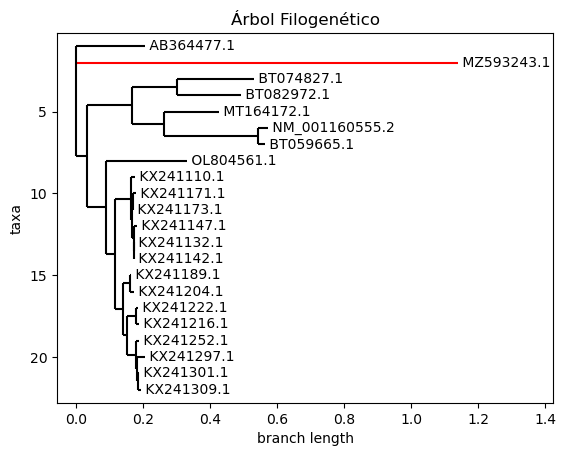

In [48]:
plot_tree(tree, color_dict)